In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Read in the dataset 
data= pd.read_csv("2019WinterDataScienceInternChallengeDataSet1.csv")
# First 5 rows of the DataFrame
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [9]:
#Total columns in the Dataframe
data.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [20]:
# Make sure all of the shop ids are equal to the number of sneaker shops
data.shop_id.value_counts()

# The problem states that there are 100 sneaker shops and there are 100 unique
#   shop_ids, so that tells me that I can assume these are all the sneaker
#   shop ids and that there are no other shops included in this data.

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [12]:
# number of observations and columns in the dataset
data.shape

(5000, 7)

In [13]:
data.values

array([[1, 53, 746, ..., 2, 'cash', '2017-03-13 12:36:56'],
       [2, 92, 925, ..., 1, 'cash', '2017-03-03 17:38:52'],
       [3, 44, 861, ..., 1, 'cash', '2017-03-14 4:23:56'],
       ...,
       [4998, 56, 867, ..., 3, 'cash', '2017-03-19 5:42:42'],
       [4999, 60, 825, ..., 2, 'credit_card', '2017-03-16 14:51:18'],
       [5000, 44, 734, ..., 2, 'debit', '2017-03-18 15:48:18']],
      dtype=object)

In [14]:
#Check if there are any null/NaN values
data.isnull().sum()
# There are no null/NaN values in this dataset

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [11]:
# statistics of the data
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
#The mean is 3145.128000
#However, the 50 percentile is only 284.000000,
#and the 75 percentile is only 390.000000
#There are outliers in the data that we have to remove

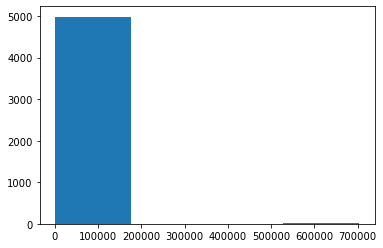

In [25]:
# Check for outliers using a histogram
plt.hist(data.order_amount,bins=4);

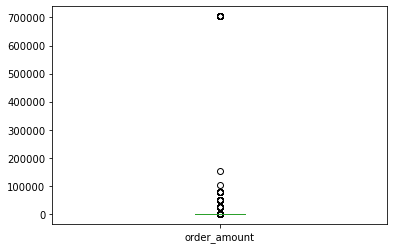

In [27]:
# Plot out the order amounts using a box plot
data.order_amount.plot(kind='box');

In [28]:
#Can clearly see from the histogram and box plot that their are outliers 

In [29]:
# What is the median amount for the orders
data.order_amount.median()

284.0

In [30]:
# Top 30 highest order amounts and the number of times they appear
data.order_amount.value_counts().sort_index(ascending=False).head(30)

704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
1056       3
980        1
965        1
960        2
948        1
935        3
920        1
890        1
885        2
880        3
865        2
845        1
830        3
816        1
815        2
810        1
805        2
804        2
800        3
790        2
Name: order_amount, dtype: int64

In [32]:
# Create an "outlier" column for any order amount that is greater than the 
#   75 percentile value, adding a 1 to the column if it is an outlier and 
#   a 0 to the column if it is not considered an outlier
data['outlier'] = np.where(data.order_amount > 390, 1, 0)

#  first 5 rows of the data dataset
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0


In [35]:
# Pull all the rows where the outlier value is 1 and create a new DataFrame
outliers = data.loc[data['outlier'] == 1]

# Check my work
print(data.shape)
# Explore some of the values
outliers.head(20)

(5000, 8)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
14,15,87,849,447,3,credit_card,2017-03-10 11:23:18,1
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,1
19,20,63,898,408,3,credit_card,2017-03-29 15:11:52,1
21,22,97,789,486,3,credit_card,2017-03-04 15:44:00,1
22,23,88,985,704,4,credit_card,2017-03-22 1:19:41,1
24,25,73,917,495,3,cash,2017-03-03 13:01:03,1
32,33,76,712,465,3,credit_card,2017-03-10 23:54:10,1
36,37,84,979,459,3,credit_card,2017-03-05 22:44:34,1
42,43,18,934,624,4,debit,2017-03-21 6:59:10,1
45,46,29,969,652,4,credit_card,2017-03-04 8:58:23,1


In [36]:
# Get the sum of all of the total items in the data dataset
tot_items = data.total_items.sum()
# Get the sum of all of the order amounts in the data dataset
tot_amt = data.order_amount.sum()

print(f'Total number of items purchased: {tot_items}\n')
print(f'Total amount of sales: ${tot_amt:,.2f}\n')
print(f'Average price per item: ${tot_amt/tot_items:,.2f}\n')

Total number of items purchased: 43936

Total amount of sales: $15,725,640.00

Average price per item: $357.92



In [38]:
# Create a new DataFrame without the outliers
no_outliers = data.loc[data['outlier'] == 0]

# Check my work
print(no_outliers.shape)
# Look at some of the data
no_outliers.head(20)

(3753, 8)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,0
6,7,87,915,149,1,cash,2017-03-01 21:37:57,0
7,8,22,761,292,2,cash,2017-03-08 2:05:38,0
8,9,64,914,266,2,debit,2017-03-17 20:56:50,0
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26,0


In [40]:
# Get the sum of the total items without the outliers
tot_items = no_outliers.total_items.sum()
# Get the sum of the total order amounts without the outliers
tot_amt = no_outliers.order_amount.sum()
# Get the total number of occurances without the outliers
num_sales = no_outliers.shape[0]

print(f'Total number of items purchased without outliers: {tot_items}\n')
print(f'Total amount of sales without outliers: ${tot_amt:,.2f}\n')
print(f'Total number of sales without outliers: {num_sales}\n')
print(f'Average price per item without outliers: ${tot_amt/tot_items:,.2f}\n')
print(f'Average sale amount without the outliers: ${tot_amt/num_sales:,.2f}\n')
print(
    f'Median order amount with outliers: ${data.order_amount.median():,.2f}\n'
    )
print(
    f'Median order amount without outliers: \
${no_outliers.order_amount.median():,.2f}\n'
    )

Total number of items purchased without outliers: 5880

Total amount of sales without outliers: $864,914.00

Total number of sales without outliers: 3753

Average price per item without outliers: $147.09

Average sale amount without the outliers: $230.46

Median order amount with outliers: $284.00

Median order amount without outliers: $224.00



In [41]:
# statistics of the data dataset without the outliers
no_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items,outlier
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.0
mean,2513.408740,49.369571,850.266454,230.459366,1.566747,0.0
std,1446.148414,29.143076,86.773818,85.971642,0.588973,0.0
min,1.000000,1.000000,700.000000,90.000000,1.000000,0.0
25%,1261.000000,24.000000,776.000000,153.000000,1.000000,0.0
50%,2519.000000,49.000000,851.000000,224.000000,2.000000,0.0
75%,3767.000000,74.000000,925.000000,312.000000,2.000000,0.0
max,5000.000000,100.000000,999.000000,390.000000,4.000000,0.0
